# Finding the Roots or Solutions to Non-Linear Equations

Let's say you need to solve the following equation:

$ \large x = 2 e^{-x} \label{eq1}\tag{1}$

First we need to turn this equation into a problem of finding its root(s). This is done by placing the equation into the form $f(x) = 0$. In the case of Eq.($\ref{eq1}$):

$ \large x - 2 e^{-x} = 0 \label{eq2}\tag{2}$

So here, $f(x) = x - 2 e^{-x}$. This problem has now become a root-finding problem, or finding where the function crosses the $x$-axis.

### Graphing
Clearly we will be making some graphs in this module... so let's make a graph of the example function from Eq.($\ref{eq2}$). Note there is a more thorough explanation of [how to use *psm_plot.py*](how_to_use_psm_plot.ipynb). This is my own set of functions to make it somewhat easier to use the *matplotlib* plotting library.

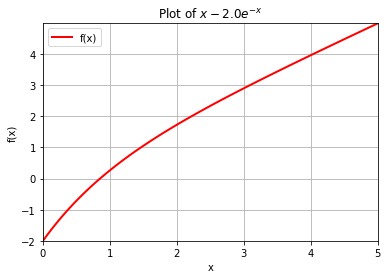

In [1]:
%matplotlib inline

from math import *
import sympy as sympy
import sys
sys.path.append("/home/elemley/engr3703/psm_plot")
###NOTE: Your psm_plot.py will be in a different location...
from psm_plot import *

def f_string():
    fn_string = 'x - 2.0 * exp(-x)'
    #Note this is just so I can have a single definition of a function as a string
    #This is handy for typesetting the function properly on the graph
    return fn_string

def f(x):
    string = f_string()
    #Note the definition of the function is actually in f_string
    #The next line turns the string into an equation and plugs in x !
    tmp = eval(string)
    return tmp

def main():
    #Make a list of x values
    x = np.linspace(0, 5, 100)    
    function_name = f_string()
    function_syms = sympy.latex(sympy.sympify(function_name))
    title_base = "Plot of " + "$" + function_syms + "$"
    title = title_base
    filename = "example_plot1.png"
    xlabel = "x"
    ylabel = "f(x)"
    y_func_label = function_name
    Function0Plot111(x,f,xlabel,ylabel,title,filename) #Please see the code in 
        
if __name__ == '__main__':
    main()


***So the root of this function is somewhere between 0 and 1.*** We will use this fact below in using various techniques of root finding.

## Bracketing Techniques for Root Finding
In this context *bracketing the root* means that initially we have two values (here I will always call these $a$ and $b$) between which we know the root must lie. Our goal is to find an automated way to figure this out, which might seem difficult, but since we can find $f(a)$ and $f(b)$ and we know that these **should have different signs**... we know the product of $f(a)f(b)$ should be negative, if $a$ and $b$ bracket the root (Note here we are assuming there is only one root... multiple roots are addressed later).

$ \large if~~f(a)f(b)<0,~~and~~a<b,~~then~~a<x_{root}~~and~~b>x_{root}\label{eq3}\tag{3}$


### Bisection

The *bisection* technique takes two $x$ values, $a$ and $b$, which bracket the root, then finds the mid-point of those values, $ x_{root} = \frac{a+b}{2}$. The next step is to determine whether the actual root is between $a$ and $x_{root}$, or between $x_{root}$ and $b$. Based on the results of this determination, new values of $a$ and $b$ are assumed to be the two values of $a$, $b$, or $x_{root}$ that bracket the root. Here are the steps to this algorithm:

1. Input (or set via code) $a$ and $b$ values believed to bracket the root.
2. Determine if $a$ and $b$ do bracket the root.
   1. Find $f(a)f(b)$ if it is $<0$ $a$ and $b$ do bracket the root.
   2. Stop the process... need new $a$ or $b$.
3. Calculate the current iteration, $i$ value of the root, $\large x_{root_i} = \frac{a+b}{2} \label{eq4}\tag{4}$
4. Determine if the root is between $a$ and $x_{root}$ or between $x_{root}$ and $b$.
   1. Find $f(a)f(x_{root_i})$:
       1. If $f(a)f(x_{root_i})<0$ then $a$ stays the same, but $b = x_{root_i}$.
       2. If $f(a)f(x_{root_i})>0$ then $b$ stays the same, but $a = x_{root_i}$.
5. If $i>1$ find the *relative fractional error* $\large \epsilon_r = \lvert \frac{x_{root_i} -x_{root_{i-1}}}{x_{root_i}} \rvert \label{eq5}\tag{5}$
   1. If $i=1$ return to step 3.
   2. If $i>1$ with a *stopping criterion* of $\epsilon_s$:
      1. If $\epsilon_r < \epsilon_s$ then stop the process - you have determined the root to the precision requested.
      2. If If $\epsilon_r > \epsilon_s$ then return to step 3.


Here is a visualization of the first four iterations of bisection using the function from Eq.(2) above. The initial values of $a$ and $b$ were chosen to be *0.8* and *0.9*, respectively.

![image info](./4_iterations_of_bisection.png)

#### Bisection Code

Below you will find code that implements the bisection technique. Please note, there are a lot of extra things in addition to bisection to improve the formatting on the plot of the results.

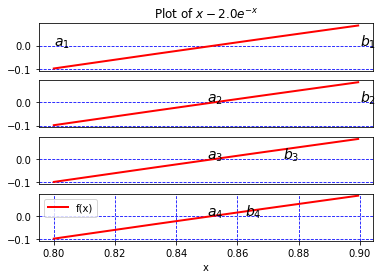

In [2]:
def f_string():
    fn_string = 'x - 2.0 * exp(-x)'
    #Note this is just so I can have a single definition of a function as a string
    #This is handy for typesetting the function properly on the graph
    return fn_string

def f(x):
    string = f_string()
    #Note the definition of the function is actually in f_string
    #The next line turns the string into an equation and plugs in x !
    tmp = eval(string)
    return tmp

def main():
    a = 0.8  # define and a and b (bracketing values)
    b = 0.9
    x_start = a
    x_end = b
    table = [["i","root approx.","rel. error"]]
    err_stop = 1e-3
    root_data = [a,b]
    a_b=[a,b]
    if f(a) * f(b) < 0:
        rel_err = 1.1 * err_stop
        max_iter = 200
        xr_old = (a + b) / 2
        for i in range(0, max_iter):
            xr = (a + b) / 2
            root_data.append(xr)
            if f(a) * f(xr) < 0:
                b = xr
            else:
                a = xr
            if i > 0:
                # calc rel_err here and compare to err_stop
                # if rel_err is less than rel_err stop the loop now
                rel_err = abs((xr-xr_old)/xr)
                table.append([i+1, xr, f"{rel_err:.2e}"])
                if rel_err <= err_stop:
                    break
            else:
                table.append([i+1, xr, "NA"])
                # if it's not put find a new xns (don't forget to store the old value in'
                # xns_old
            xr_old = xr
            a_b.append(a)
            a_b.append(b)
    else:
        print("Your a and b values do not bracket the root")

    #print(tabulate(table,tablefmt="fancy_grid", headers="firstrow"))
    
    x = np.linspace(x_start, x_end, 100)

    function_name = f_string()
    function_syms = sympy.latex(sympy.sympify(function_name))
    title_base = "Plot of " + "$" + function_syms + "$"
    title = title_base
    filename = "4_iterations_of_bisection.png"
    xlabel = "x"
    ylabel = "f(x)"
    root_data_label = "root approximations"
    y_func_label = function_name

    FunctionRootPlot411(x, xlabel, f, ylabel, root_data, root_data_label, title, filename,a_b)

if __name__ == '__main__':
    main()

### Regula Falsa (False Position)

The next bracketing technique we will consider is called *Regula Falsa* or *False Position*. This is an improvement over bisection because it takes into account the the relative size of $f(a)$ and $f(b)$.

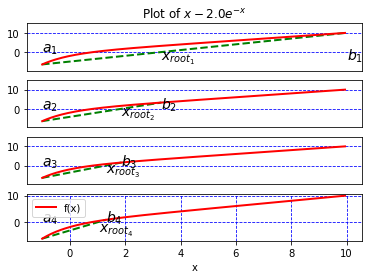

In [3]:
def f_string():
    fn_string = 'x - 2.0 * exp(-x)'
    #Note this is just so I can have a single definition of a function as a string
    #This is handy for typesetting the function properly on the graph
    return fn_string

def f(x):
    string = f_string()
    #Note the definition of the function is actually in f_string
    #The next line turns the string into an equation and plugs in x !
    tmp = eval(string)
    return tmp

def main():
    a = -1.0  # define and a and b (bracketing values)
    b = 10.0
    x_start = a
    x_end = b
    table = [["i","root approx.","rel. error"]]
    err_stop = 1e-6
    root_data = [a,b]
    a_b=[a,b]
    if f(a) * f(b) < 0:
        rel_err = 1.1 * err_stop
        max_iter = 200
        xr_old = (a*f(b)-b*f(a))/(f(b)-f(a))
        for i in range(0, max_iter):
            xr = (a*f(b)-b*f(a))/(f(b)-f(a))
            root_data.append(xr)
            if f(a) * f(xr) < 0:
                b = xr
            else:
                a = xr(a*m*f(b)-b*f(a))/(m*f(b)-f(a))
            if i > 0:
                # calc rel_err here and compare to err_stop
                # if rel_err is less than rel_err stop the loop now
                rel_err = abs((xr-xr_old)/xr)
                table.append([i+1, xr, f"{rel_err:.2e}"])
                if rel_err <= err_stop:
                    break
            else:
                table.append([i+1, xr, "NA"])
                # if it's not put find a new xns (don't forget to store the old value in'
                # xns_old
            xr_old = xr
            a_b.append(a)
            a_b.append(b)
    else:
        print("Your a and b values do not bracket the root")

    #print(tabulate(table,tablefmt="fancy_grid", headers="firstrow"))
    
    x = np.linspace(x_start, x_end, 100)

    function_name = f_string()
    function_syms = sympy.latex(sympy.sympify(function_name))
    title_base = "Plot of " + "$" + function_syms + "$"
    title = title_base
    filename = "4_iterations_of_regula_falsa.png"
    xlabel = "x"
    ylabel = "f(x)"
    root_data_label = "root approximations"
    y_func_label = function_name

    FunctionRootPlot411_regula_falsa(x, xlabel, f, ylabel, root_data, root_data_label, title, filename,a_b)

if __name__ == '__main__':
    main()